In [1]:
import numpy as np
import matplotlib.pyplot as pt
%matplotlib inline

In [2]:
from PIL import Image

with Image.open("quad.jpg") as img:
    rgb_img = np.array(img)
rgb_img.shape

(500, 1417, 3)

In [3]:
img = np.sum(rgb_img, axis=-1)
#img = rgb_img
img.shape

(500, 1417)

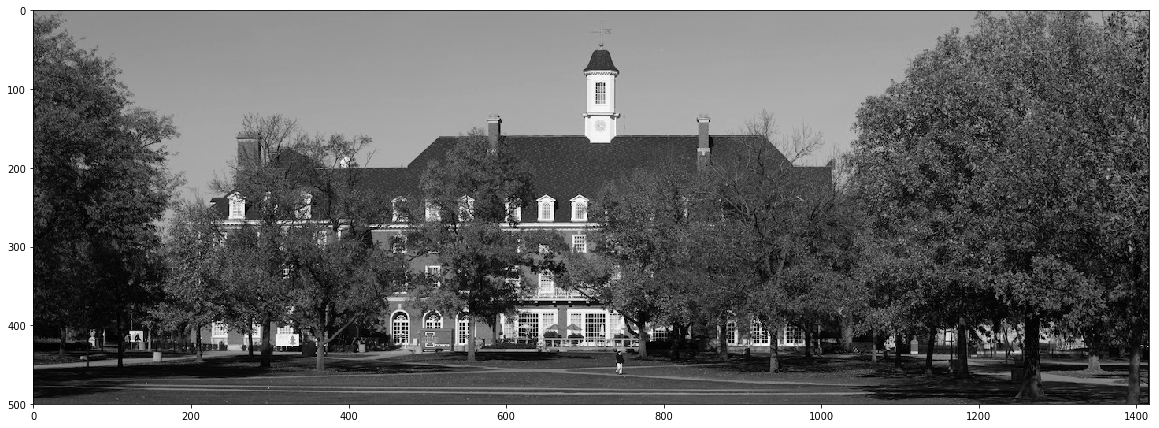

In [4]:
pt.figure(figsize=(20,10))
pt.imshow(img, cmap="gray")

In [6]:
u, sigma, vt = np.linalg.svd(img)
print(u.shape)
print(sigma.shape)
print(vt.shape)

(500, 500)
(500,)
(1417, 1417)


In [7]:
sigma[:20]

array([ 247396.54315587,   36557.3257179 ,   25874.17705805,
         25496.22463848,   23748.90437491,   16979.52895519,
         15971.95074153,   13657.37288794,   13205.3829132 ,
         12339.76658959,   11730.18565891,   11422.69314457,
         10968.73972543,    9825.9540274 ,    9539.49407186,
          8797.45886899,    8443.96658366,    8385.29429976,
          8300.05809924,    7508.31805524])

Text(0,0.5,'singular values')

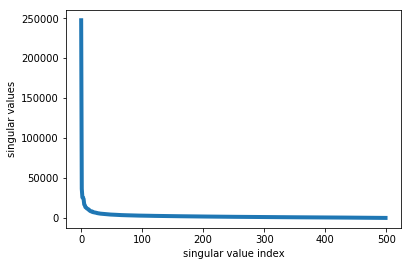

In [8]:
pt.plot(sigma, lw=4)
pt.xlabel('singular value index')
pt.ylabel('singular values')

Text(0,0.5,'singular values')

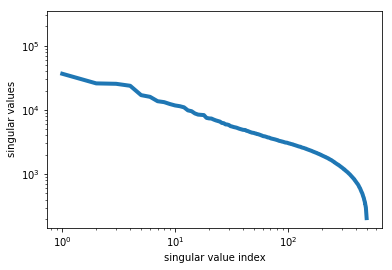

In [9]:
pt.loglog(sigma, lw=4)
pt.xlabel('singular value index')
pt.ylabel('singular values')

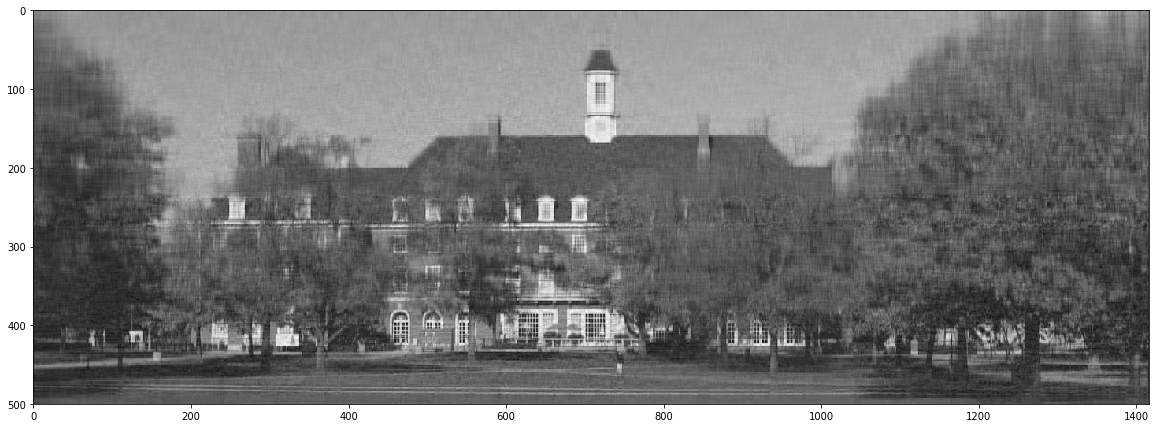

In [12]:
k=50
compressed_img = u[:,:k] @ np.diag(sigma[:k]) @ vt[:k,:]
pt.figure(figsize=(20,10))
pt.imshow(compressed_img, cmap="gray")

In [13]:
original_size = img.size
compressed_size = u[:,:k].size + sigma[:k].size + vt[:k,:].size
print("original size: %d" % original_size)
print("compressed size: %d" % compressed_size)
print("ratio: %f" % (compressed_size / original_size))

original size: 708500
compressed size: 95900
ratio: 0.135356
